In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

# random points at least 2r apart
m = 12
np.random.seed(3)
x = [np.random.uniform(size=(2))]
r = 0.16
while(len(x) < m):
    p = np.random.uniform(size=(2))
    if min(np.abs(p-a).sum() for a in x) > 2*r:
        x.append(p)
# r = 0.145
epsilon = r/2

data_X = np.array(x)
data_y = np.array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

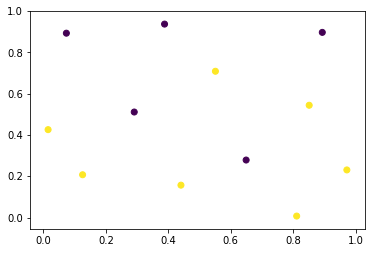

In [3]:
plt.scatter(data_X[:,0], data_X[:,1], c=data_y)
plt.show()

# Baseline: cross entropy loss

In [4]:
def neuron_layer(X, n_neurons, name, activation, kernel_initializer):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(z)
        else:
            return z

In [5]:
n_inputs = 2
n_outputs = 2

tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

he_init = tf.contrib.layers.variance_scaling_initializer()

with tf.name_scope("dnn"):
#                 neuron_layer(X, n_neurons, name, init, activation=None)
    hidden1 = neuron_layer(X, 100, name="hidden1", activation="relu", kernel_initializer=he_init)
    hidden2 = neuron_layer(hidden1, 100, name="hidden2", activation="relu", kernel_initializer=he_init)
    hidden3 = neuron_layer(hidden2, 100, name="hidden3", activation="relu", kernel_initializer=he_init)
    hidden4 = neuron_layer(hidden3, 100, name="hidden4", activation="relu", kernel_initializer=he_init)
    logits = neuron_layer(hidden4, n_outputs, name="outputs", activation=None, kernel_initializer=he_init) 
    
with tf.name_scope("loss"):
#     xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits)
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)    
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    

In [6]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


In [7]:
n_epochs = 1000
batch_size = 12

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(data_X.shape[0] // batch_size):
            print("\r{}%".format(100 * batch_index //  (data_X.shape[0] // batch_size) ), end="")
            
            shuffle_index = np.random.permutation(batch_size)
            X_batch, y_batch = data_X[shuffle_index], data_y[shuffle_index]
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: data_X, y: data_y})
        print(" ", epoch, "Train accuracy:", acc_train) 
    save_path = saver.save(sess, "./2D_fully_conected.ckpt") 


0%  0 Train accuracy: 0.41666666
0%  1 Train accuracy: 0.5833333
0%  2 Train accuracy: 0.5
0%  3 Train accuracy: 0.5833333
0%  4 Train accuracy: 0.6666667
0%  5 Train accuracy: 0.75
0%  6 Train accuracy: 0.5833333
0%  7 Train accuracy: 0.5833333
0%  8 Train accuracy: 0.6666667
0%  9 Train accuracy: 0.5833333
0%  10 Train accuracy: 0.6666667
0%  11 Train accuracy: 0.5833333
0%  12 Train accuracy: 0.6666667
0%  13 Train accuracy: 0.5833333
0%  14 Train accuracy: 0.6666667
0%  15 Train accuracy: 0.5833333
0%  16 Train accuracy: 0.6666667
0%  17 Train accuracy: 0.75
0%  18 Train accuracy: 0.5833333
0%  19 Train accuracy: 0.8333333
0%  20 Train accuracy: 0.5833333
0%  21 Train accuracy: 0.8333333
0%  22 Train accuracy: 0.5833333
0%  23 Train accuracy: 0.8333333
0%  24 Train accuracy: 0.5833333
0%  25 Train accuracy: 0.8333333
0%  26 Train accuracy: 0.6666667
0%  27 Train accuracy: 0.8333333
0%  28 Train accuracy: 0.6666667
0%  29 Train accuracy: 0.8333333
0%  30 Train accuracy: 0.6666667
0%

0%  252 Train accuracy: 0.8333333
0%  253 Train accuracy: 0.9166667
0%  254 Train accuracy: 0.8333333
0%  255 Train accuracy: 0.9166667
0%  256 Train accuracy: 0.8333333
0%  257 Train accuracy: 0.9166667
0%  258 Train accuracy: 0.8333333
0%  259 Train accuracy: 0.9166667
0%  260 Train accuracy: 0.8333333
0%  261 Train accuracy: 0.9166667
0%  262 Train accuracy: 0.8333333
0%  263 Train accuracy: 0.9166667
0%  264 Train accuracy: 0.8333333
0%  265 Train accuracy: 0.8333333
0%  266 Train accuracy: 0.8333333
0%  267 Train accuracy: 0.8333333
0%  268 Train accuracy: 0.8333333
0%  269 Train accuracy: 0.8333333
0%  270 Train accuracy: 0.8333333
0%  271 Train accuracy: 0.8333333
0%  272 Train accuracy: 0.8333333
0%  273 Train accuracy: 0.8333333
0%  274 Train accuracy: 0.8333333
0%  275 Train accuracy: 0.8333333
0%  276 Train accuracy: 0.8333333
0%  277 Train accuracy: 0.8333333
0%  278 Train accuracy: 0.8333333
0%  279 Train accuracy: 0.8333333
0%  280 Train accuracy: 0.8333333
0%  281 Train 

0%  606 Train accuracy: 0.9166667
0%  607 Train accuracy: 0.9166667
0%  608 Train accuracy: 0.9166667
0%  609 Train accuracy: 0.9166667
0%  610 Train accuracy: 0.8333333
0%  611 Train accuracy: 0.8333333
0%  612 Train accuracy: 0.8333333
0%  613 Train accuracy: 0.8333333
0%  614 Train accuracy: 0.8333333
0%  615 Train accuracy: 0.8333333
0%  616 Train accuracy: 0.8333333
0%  617 Train accuracy: 0.9166667
0%  618 Train accuracy: 0.9166667
0%  619 Train accuracy: 0.9166667
0%  620 Train accuracy: 0.9166667
0%  621 Train accuracy: 0.9166667
0%  622 Train accuracy: 1.0
0%  623 Train accuracy: 0.9166667
0%  624 Train accuracy: 0.9166667
0%  625 Train accuracy: 0.9166667
0%  626 Train accuracy: 1.0
0%  627 Train accuracy: 0.9166667
0%  628 Train accuracy: 0.9166667
0%  629 Train accuracy: 0.9166667
0%  630 Train accuracy: 0.9166667
0%  631 Train accuracy: 0.9166667
0%  632 Train accuracy: 0.8333333
0%  633 Train accuracy: 0.8333333
0%  634 Train accuracy: 0.8333333
0%  635 Train accuracy: 0.

INFO:tensorflow:Restoring parameters from ./2D_fully_conected.ckpt


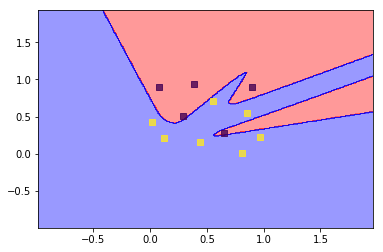

In [8]:
from matplotlib.colors import ListedColormap
# plot the decision surface
x1_min, x1_max = data_X[:, 0].min() - 1, data_X[:, 0].max() + 1
x2_min, x2_max = data_X[:, 1].min() - 1, data_X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

with tf.Session() as sess:
    saver.restore(sess, "./2D_fully_conected.ckpt") # or better, use save_path
    
    X_new_scaled = np.array([xx1.ravel(), xx2.ravel()]).T
    Z = logits.eval(feed_dict={X: X_new_scaled})
    Z = np.argmax(Z, axis=1)
    
    #Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(data_y))])    
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plot all samples
X_test, y_test = data_X, data_y
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=data_X[:, 0], y=data_X[:, 1], alpha=0.8, c=data_y, marker=markers[idx], label=cl)
plt.show()

In [17]:
r_1 = 0.1
r_1

0.1

INFO:tensorflow:Restoring parameters from ./2D_fully_conected.ckpt


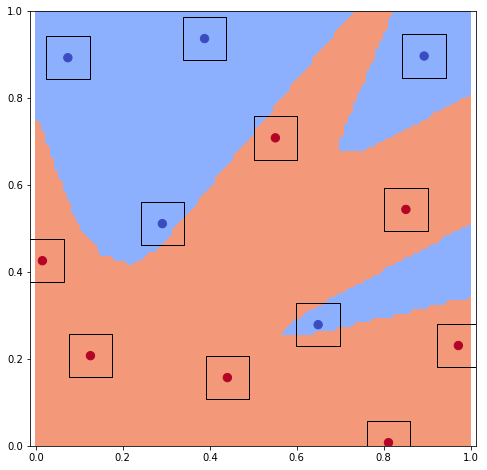

In [18]:
import matplotlib.patches as patches
XX, YY = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

with tf.Session() as sess:
    saver.restore(sess, "./2D_fully_conected.ckpt") # or better, use save_path
    X_new_scaled = np.array([XX.ravel(), YY.ravel()]).T
    Z = logits.eval(feed_dict={X: X_new_scaled})
    Z = np.argmax(Z, axis=1)
    
    #Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(XX.shape)
#     ZZ = (y0[:,0] - y0[:,1]).resize(100,100).data.numpy()

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(data_y))])    

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(XX,YY,Z, cmap="coolwarm", levels=np.linspace(-1000,1000,3))
ax.scatter(data_X[:,0], data_X[:,1], c=data_y, cmap="coolwarm", s=70)
ax.axis("equal")
ax.axis([0,1,0,1])

for a in x:
    ax.add_patch(patches.Rectangle((a[0]-r_1/2, a[1]-r_1/2), r_1, r_1, fill=False))
plt.show()

In [23]:
with tf.Session() as sess:
    saver.restore(sess, "./2D_fully_conected.ckpt") # or better, use save_path
    
    logits_array = logits.eval(feed_dict={X: X_batch, y: y_batch})
    correct_array = correct.eval(feed_dict={X: X_batch, y: y_batch})
    y_array = y.eval(feed_dict={X: X_batch, y: y_batch})
    print(logits_array)
    print(correct_array)
    print(y_array)

INFO:tensorflow:Restoring parameters from ./2D_fully_conected.ckpt
[[ 0.1861331  -0.8129001 ]
 [-4.7201557   5.664054  ]
 [-2.5113037  -0.5335217 ]
 [-0.5273702  -2.3291585 ]
 [ 0.07963921 -4.643283  ]
 [ 1.5375612  -6.631136  ]
 [-2.8736696   1.8118718 ]
 [-1.7617116   0.4675934 ]
 [-1.4829061   1.4213495 ]
 [-2.8239942   0.9628093 ]
 [-0.36529636 -2.1084447 ]
 [-2.0683446   2.4147718 ]]
[ True  True  True  True  True  True  True  True  True  True  True  True]
[0 1 1 0 0 0 1 1 1 1 0 1]
